**30E03000 - Data Science for Business I (2022)**

# Tutorial 3: Shopping Baskets analysis and Association Rule mining with Apriori

### Business problem

Association rule mining is a technique to identify underlying relations between different items. Take an example of a supermarket where customers can buy a variety of items. Usually there is a pattern in what customers buy. For instance, parents buy baby products such as milk and diapers **together**. University students may buy beer and chips **together**. In short, **transactions involve patterns. More profit can be generated if the relationship between the items purchased in different transactions can be identified.** 

<table><tr>
<td> <img src="Images/kplussa.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="Images/skortti.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

If item A and B are bought together more frequently then several steps can be taken to increase the profit. For example:

1. A and B can be placed together so that when a customer buys one of the product she doesn't have to go far away to buy the other product.
2. People who buy one of the products can be targeted through an advertisement campaign to buy the other.
3. Collective discounts can be offered on these products if the customer buys both of them.
4. Both A and B can be packaged together. 

<font color='red'>**The process of identifying an associations between products is called association rule mining.**</font> [[1]](https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/)




### Learning objectives

In this tutorial we will learn:
- how to perform association rule mining in Python with the **Apriori algorithm** to find common shopping patterns,
- how to define new variables based on these patterns, 
- how to use background data to understand what kind of customers are behind these patterns, 
- how to apply a Decision Tree algorithm to connect background data to the newly found ("mined") shopping patterns.

### Key words

`Apriori`, `association rule mining`, `shopping basket analysis`, `Decision Trees`

### Happy shopping!

<br>
<img src="Images/blackFriday.jpg" width="400">

## Apriori theory recap

There are three major components of the Apriori algorithm:

- Support
- Confidence
- Lift

Suppose we have a record of 1000 customer transactions, and we want to find the Support, Confidence, and Lift for two items e.g. burgers and ketchup. Out of 1000 transactions, 100 contain ketchup while 150 contain a burger. In 50 out of the 150 burger transactions, customers also bought ketchup. 

Using this data, we want to find the support, confidence, and lift.

<br>
<img src="Images/burgerKetchup.png" width="400">

#### Support

Support refers to the **default popularity of an item** and can be calculated by finding the number of transactions containing a particular item divided by total number of transactions. Suppose we want to find support for item B. This can be calculated as:

`Support(B) = (Transactions containing (B))/(Total Transactions)`

For instance if out of 1000 transactions, 100 transactions contain Ketchup then the support for item Ketchup can be calculated as:

`Support(Ketchup) = (Transactions containingKetchup)/(Total Transactions)
Support(Ketchup) = 100/1000 = 10%`

#### Confidence

Confidence refers to the **likelihood that an item B is also bought if item A is bought (P(B|A)).** It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought. Mathematically, it can be represented as:

`Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)` 

Coming back to our problem, we had 50 transactions where Burger and Ketchup were bought together. While in 150 transactions, burgers are bought. Then we can find likelihood of buying ketchup when a burger is bought can be represented as confidence of Burger -> Ketchup and can be mathematically written as:

`Confidence(Burger→Ketchup) = (Transactions containing both (Burger and Ketchup))/(Transactions containing Burger) = 50/150 = 33.3%`

#### Lift

`Lift(A→B)` refers to the **increase in the ratio of sale of B when A is sold.** Lift(A→B) can be calculated by dividing `Confidence(A→B)` by `Support(B)`. Mathematically it can be represented as:

`Lift(A→B) = (Confidence (A→B))/(Support (B))`

Coming back to our Burger and Ketchup problem, the `Lift(Burger→Ketchup)` can be calculated as:

`Lift(Burger→Ketchup) = (Confidence (Burger→Ketchup))/(Support (Ketchup)
Lift(Burger→Ketchup) = 33.3/10 = 3.33`

Lift basically tells us that the likelihood of buying a Burger and Ketchup together is 3.33 times more than the likelihood of just buying the ketchup. A Lift of 1 means there is no association between products A and B. Lift of greater than 1 means products A and B are more likely to be bought together. Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together.

## Steps involved in Apriori

For large sets of data, there can be hundreds of items in hundreds of thousands transactions. The Apriori algorithm tries to extract rules for each possible combination of items. For instance, Lift can be calculated for item 1 and item 2, item 1 and item 3, item 1 and item 4 and then item 2 and item 3, item 2 and item 4 and then combinations of items e.g. item 1, item 2 and item 3; similarly item 1, item 2, and item 4, and so on.

As you can see from the above example, this process can be extremely slow due to the number of combinations. To speed up the process, we need to perform the following steps:

1. **Set a minimum treshold for support**. This means that we are only interested in finding rules for the items that have certain default existence (e.g. support) and have a minimum value for co-occurrence with other items (e.g. confidence).
2. Extract all the subsets having higher value of support than minimum threshold.
3. Select all the rules from the subsets with confidence value higher than minimum threshold.
4. Order the rules by descending order of Lift.

Enough with the theory, let's get our hands dirty!

## Import libraries

The first step, as always, is to import the required libraries. 

Luckily, we do not need to write the Apriori script to calculate support, confidence, and lift for all the possible combination of items. We will use an off-the-shelf library where all of the code has already been implemented: [mlxtend](https://github.com/rasbt/mlxtend)

In [1]:
import pandas as pd #data frames (for storing data)
import numpy as np #scientific computing
import itertools 

import matplotlib.pyplot as plt #plotting

#Apriori library
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#Visualize association rules
import networkx as nx  
import random

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.model_selection import train_test_split #Data split function
from sklearn.metrics import accuracy_score

#Decision tree plotting
import pydotplus
from IPython.display import Image 
from IPython.display import HTML, display

## Load data

In [2]:
data = pd.read_csv('shoppingdata.txt')
data.head() #Let's call the head() function to see how the dataset looks

,cardid,value,pmethod,sex,homeown,income,age,fruitveg,freshmeat,dairy,cannedveg,cannedmeat,frozenmeal,beer,wine,softdrink,fish,confectionery
0,39808,42.7123,CHEQUE,M,NO,27000,46,F,T,T,F,F,F,F,F,F,F,T
1,67362,25.3567,CASH,F,NO,30000,28,F,T,F,F,F,F,F,F,F,F,T
2,10872,20.6176,CASH,M,NO,13200,36,F,F,F,T,F,T,T,F,F,T,F
3,26748,23.6883,CARD,F,NO,12200,26,F,F,T,F,F,F,F,T,F,F,F
4,91609,18.8133,CARD,M,YES,11000,24,F,F,F,F,F,F,F,F,F,F,F


## Exploratory data analysis (EDA)

Our data set has 18 features (dimensions) and 1000 observations:

In [3]:
data.shape

(1000, 18)

In [4]:
data.describe()

,cardid,value,income,age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,60405.704000,29.398240,20171.800000,32.840000
std,29494.202111,11.555366,5767.558365,10.342793
min,10150.000000,10.007000,10200.000000,16.000000
25%,34577.000000,19.057800,15275.000000,24.000000
50%,60629.500000,29.430550,20150.000000,32.000000
75%,87003.750000,39.127025,25100.000000,42.000000
max,109884.000000,49.886300,30000.000000,50.000000


The shopping items (fruitveg, freshmeat, ...) are encoded as "F" or "T", indicated whether a shopping basket includes the item. Calling the `data.info()` function, we observe that these variables are of type object. **Pandas reads them as strings, not as boolean (True, False).**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cardid         1000 non-null   int64  
 1   value          1000 non-null   float64
 2   pmethod        1000 non-null   object 
 3   sex            1000 non-null   object 
 4   homeown        1000 non-null   object 
 5   income         1000 non-null   int64  
 6   age            1000 non-null   int64  
 7   fruitveg       1000 non-null   object 
 8   freshmeat      1000 non-null   object 
 9   dairy          1000 non-null   object 
 10  cannedveg      1000 non-null   object 
 11  cannedmeat     1000 non-null   object 
 12  frozenmeal     1000 non-null   object 
 13  beer           1000 non-null   object 
 14  wine           1000 non-null   object 
 15  softdrink      1000 non-null   object 
 16  fish           1000 non-null   object 
 17  confectionery  1000 non-null   object 
dtypes: float6

The Apriori algorithm cannot make sense of the strings, so we have to transform them into boolean values.

It is tempting to tell Pandas to replace *all* "T" and "F" values in the whole dataset with "True" and "False". This approach, however, would cause issues as it would also affect the gender column where "female" is encoded as "F". 

Instead, we store the column names of all shopping items in a list called `items` and then tell pandas to replace all values in these colums using the `replace`function:

In [6]:
items = ['fruitveg', 'freshmeat', 'dairy',  'cannedveg', 'cannedmeat', 'frozenmeal', 'beer', 
         'wine', 'softdrink', 'fish', 'confectionery']
data[items] = data[items].replace({'T':True, 'F':False}) #replace only values in the columns specified in "items"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cardid         1000 non-null   int64  
 1   value          1000 non-null   float64
 2   pmethod        1000 non-null   object 
 3   sex            1000 non-null   object 
 4   homeown        1000 non-null   object 
 5   income         1000 non-null   int64  
 6   age            1000 non-null   int64  
 7   fruitveg       1000 non-null   bool   
 8   freshmeat      1000 non-null   bool   
 9   dairy          1000 non-null   bool   
 10  cannedveg      1000 non-null   bool   
 11  cannedmeat     1000 non-null   bool   
 12  frozenmeal     1000 non-null   bool   
 13  beer           1000 non-null   bool   
 14  wine           1000 non-null   bool   
 15  softdrink      1000 non-null   bool   
 16  fish           1000 non-null   bool   
 17  confectionery  1000 non-null   bool   
dtypes: bool(1

The shopping items are now of type bool(en): True, False.

In [7]:
data.head()

,cardid,value,pmethod,sex,homeown,income,age,fruitveg,freshmeat,dairy,cannedveg,cannedmeat,frozenmeal,beer,wine,softdrink,fish,confectionery
0,39808,42.7123,CHEQUE,M,NO,27000,46,False,True,True,False,False,False,False,False,False,False,True
1,67362,25.3567,CASH,F,NO,30000,28,False,True,False,False,False,False,False,False,False,False,True
2,10872,20.6176,CASH,M,NO,13200,36,False,False,False,True,False,True,True,False,False,True,False
3,26748,23.6883,CARD,F,NO,12200,26,False,False,True,False,False,False,False,True,False,False,False
4,91609,18.8133,CARD,M,YES,11000,24,False,False,False,False,False,False,False,False,False,False,False


## Applying Apriori: "*what* is bought together?"

Now we will use the Apriori algorithm to find out which items are commonly sold together, so that the store owner can take action to place the related items together or advertise them together in order to have increased profit.

First, we select all columns with shopping items (already stored in the `items` variable) and store them in a new dataframe `records`:

In [8]:
records = data[items]
records.head()

,fruitveg,freshmeat,dairy,cannedveg,cannedmeat,frozenmeal,beer,wine,softdrink,fish,confectionery
0,False,True,True,False,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,True,True,False,False,True,False
3,False,False,True,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


1. We select only items with a `min_support` of 10% in order to focus on the truly often bought items. (recall that a min support = 0.1 means that the inderlying item has been bought in at least 10% of all observations). 


2. We filter out itemsets that contain less than 2 items. The Apriori algorithm would otherwise list single items in the itemset (yes, this is annyoing).

In [9]:
frequent_itemsets = apriori(records, min_support=0.1, use_colnames=True) #filter min_support=10%
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) #create length column
frequent_itemsets[(frequent_itemsets['length'] >= 2)] #only list itemsets with at least 2 items 
#we do not remove the single items (length = 1) from the dataset! 
#frequent_itemsets

,support,itemsets,length
11,0.145,"(fruitveg, fish)",2
12,0.173,"(frozenmeal, cannedveg)",2
13,0.167,"(beer, cannedveg)",2
14,0.170,"(frozenmeal, beer)",2
15,0.144,"(wine, confectionery)",2
16,0.146,"(frozenmeal, beer, cannedveg)",3


3. With the just identified `frequent_itemsets` (what's bought together?), we call the `association_rules()` function from the Apriori library to find a set of rules. Note that we only include rules with a Lift of 1.6 or higher in order to focus on rules that are likely to increase sales (recall that Lift basically tells us that the likelihood of buying A and B together is x times higher than the likelihood of just buying B.)

In [10]:
#rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.6) #only include rules with Lift >= 1.6
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fruitveg),(fish),0.299,0.292,0.145,0.484950,1.660787,0.057692,1.374623
1,(fish),(fruitveg),0.292,0.299,0.145,0.496575,1.660787,0.057692,1.392463
2,(frozenmeal),(cannedveg),0.302,0.303,0.173,0.572848,1.890586,0.081494,1.631736
3,(cannedveg),(frozenmeal),0.303,0.302,0.173,0.570957,1.890586,0.081494,1.626877
4,(beer),(cannedveg),0.293,0.303,0.167,0.569966,1.881075,0.078221,1.620802
5,(cannedveg),(beer),0.303,0.293,0.167,0.551155,1.881075,0.078221,1.575154
6,(frozenmeal),(beer),0.302,0.293,0.170,0.562914,1.921208,0.081514,1.617530
7,(beer),(frozenmeal),0.293,0.302,0.170,0.580205,1.921208,0.081514,1.662715
8,(wine),(confectionery),0.287,0.276,0.144,0.501742,1.817906,0.064788,1.453063
9,(confectionery),(wine),0.276,0.287,0.144,0.521739,1.817906,0.064788,1.490818


4. This leaves us with 16 rules. Note how many rules are redundant (A -> B, B -> A).

5. The tables above show **three unique association rules** or itemsets:
    - wine and confectionary (chocolate)
    - fish and fruit/vegetables
    - beer, frozen vegetables and pizza
    
6. Plot the rules:

In [11]:
support = rules['support'].values
confidence = rules['confidence'].values

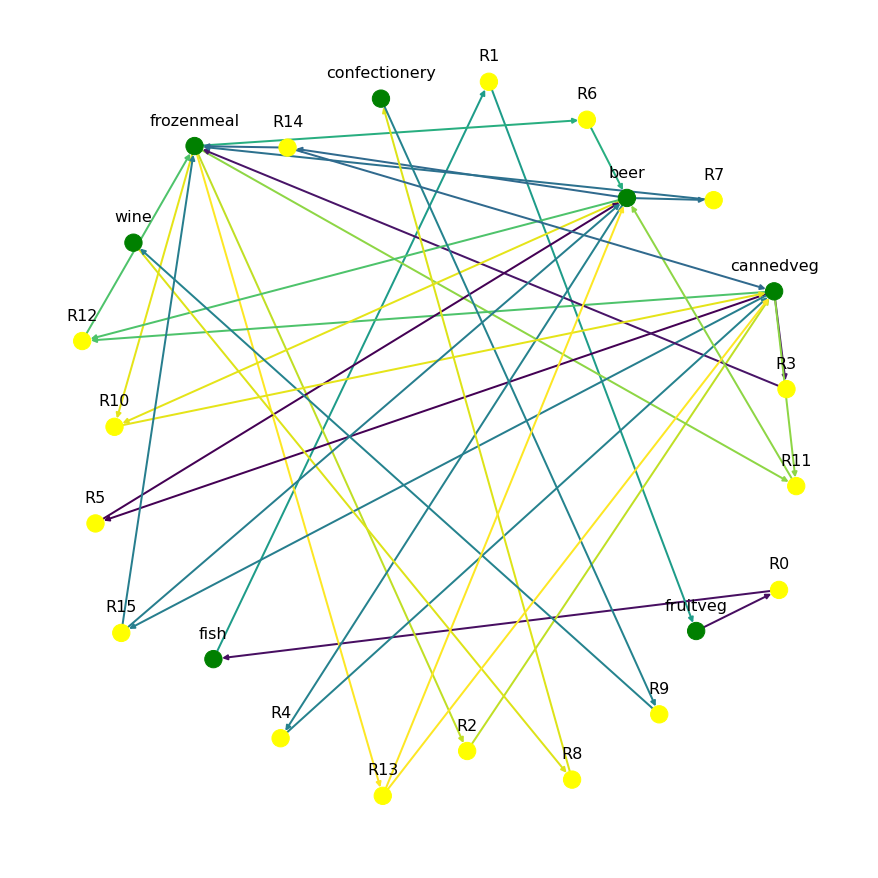

In [12]:
#The code below is arguably quite tricky. You are not expected to reproduce this in any assignment or exam! Either 
#it will be omitted or provided to you. It is included here to help you understand the connection of items and 
#rules by visualizing them in a "spider web".

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    
    color_map=[]
    N = 50
    colors = np.random.rand(N)
    
    strs = []
    for i in range(len(rules)):
        strs.append('R{}'.format(i))   
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
        
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
   
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1, k=16, scale=1)
    plt.figure(1,figsize=(12,12)) 

    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos, font_size=16)
    plt.show()

draw_graph(rules, 16)

## "So, *who* buys it?"

## Data Preprocessing

In [13]:
data.head()

,cardid,value,pmethod,sex,homeown,income,age,fruitveg,freshmeat,dairy,cannedveg,cannedmeat,frozenmeal,beer,wine,softdrink,fish,confectionery
0,39808,42.7123,CHEQUE,M,NO,27000,46,False,True,True,False,False,False,False,False,False,False,True
1,67362,25.3567,CASH,F,NO,30000,28,False,True,False,False,False,False,False,False,False,False,True
2,10872,20.6176,CASH,M,NO,13200,36,False,False,False,True,False,True,True,False,False,True,False
3,26748,23.6883,CARD,F,NO,12200,26,False,False,True,False,False,False,False,True,False,False,False
4,91609,18.8133,CARD,M,YES,11000,24,False,False,False,False,False,False,False,False,False,False,False


### <font color='red'>Make new variables</font> 

Based on these findings, **we create 3 new variables.** Each of them is True ONLY if all their subset variables are True.

In [14]:
data['wine_and_choco'] = ((records['wine']==True) & (records['confectionery']==True))
data['fish_and_fruit'] = ((records['fish']==True) & (records['fruitveg']==True))
data['beer_beans_pizza'] = ((records['beer']==True) & (records['cannedveg']==True) & (records['frozenmeal']==True))

In [15]:
data.head().style

,cardid,value,pmethod,sex,homeown,income,age,fruitveg,freshmeat,dairy,cannedveg,cannedmeat,frozenmeal,beer,wine,softdrink,fish,confectionery,wine_and_choco,fish_and_fruit,beer_beans_pizza
0,39808,42.712300,CHEQUE,M,NO,27000,46,False,True,True,False,False,False,False,False,False,False,True,False,False,False
1,67362,25.356700,CASH,F,NO,30000,28,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,10872,20.617600,CASH,M,NO,13200,36,False,False,False,True,False,True,True,False,False,True,False,False,False,True
3,26748,23.688300,CARD,F,NO,12200,26,False,False,True,False,False,False,False,True,False,False,False,False,False,False
4,91609,18.813300,CARD,M,YES,11000,24,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Select feature variables

Create a new dataframe "features" that stores all explanatory/independent/feature variables that we will use to explain/predict whether customers will buy our newly found combined products.

In [16]:
features = ['value', 'pmethod', 'sex', 'homeown', 'income', 'age']
X = data[features]
X.head()

,value,pmethod,sex,homeown,income,age
0,42.7123,CHEQUE,M,NO,27000,46
1,25.3567,CASH,F,NO,30000,28
2,20.6176,CASH,M,NO,13200,36
3,23.6883,CARD,F,NO,12200,26
4,18.8133,CARD,M,YES,11000,24


### Encode categorical variables

Using the (by now familiar) pandas `get_dummies()` function.

In [17]:
X = pd.get_dummies(X, columns=["pmethod", "sex", "homeown"], prefix=["pmethod", "sex", "homeown"]) #we add a prefix for easier identification

In [18]:
X.head()

,value,income,age,pmethod_CARD,pmethod_CASH,pmethod_CHEQUE,sex_F,sex_M,homeown_NO,homeown_YES
0,42.7123,27000,46,0,0,1,0,1,1,0
1,25.3567,30000,28,0,1,0,1,0,1,0
2,20.6176,13200,36,0,1,0,0,1,1,0
3,23.6883,12200,26,1,0,0,1,0,1,0
4,18.8133,11000,24,1,0,0,0,1,0,1


## 1. Beer, Beans, Pizza

### Data split


 <font color='red'>In previous tutorials, we had one "global" label/target vector `y` (e.g. fraudulent, reponse, etc.). Now, we have three different label vectors for the three newly-mined association rules. Thus, we have to specify a new target vector for each association rule and perform a split accordingly. Instead of just `y`, we call it `y_BBP` (for beer, beans, pizza):</font> 


In [19]:
y_BBP = data['beer_beans_pizza']
X_train, X_test, y_train, y_test = train_test_split(X, y_BBP, test_size = 0.3, random_state = 12345) #split data 70:30a

### Tree model

Train the Decision Tree model:

In [20]:
#Define and fit the Decision tree classifier with some default parameters
clf = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=2, 
                             min_samples_leaf=3).fit(X_train, y_train)

In [21]:
#Use classifier to predict labels
y_pred = clf.predict(X_test)

In [22]:
print ("Accuracy is: ", (accuracy_score(y_test,y_pred)*100).round(2))

Accuracy is:  96.67


Fontconfig error: Cannot load default config file



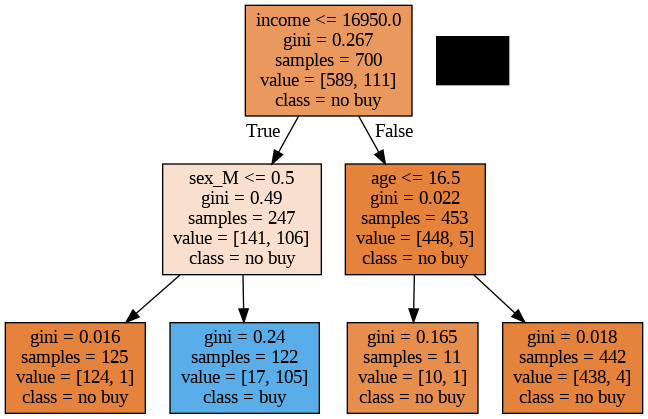

In [23]:
'''
The graphviz library is used to visualize the tree. 
'''

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=['no buy', 'buy'], filled=True) #or use y_train.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PNG 
#graph.write_png("clf.png") #uncomment this line to save the plot as a .png file

Who buys beer, frozen vegetables and pizza? 
- male (propability of sex_M <= 0.5 = False (right branch) means male)
- income below $ 16950 ( mean 20171, max 30000)

Could be (university) students, low-income single men, etc.

<table><tr>
<td> <img src="Images/menpizza.jpg" alt="Drawing" style="width: 450px;"/> </td>
<td> <img src="Images/pizzashirt.jpg" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="Images/pizza.jpg" alt="Drawing" style="width: 350px;"/> </td>


</tr></table>

# 2. Wine and chocolate

### Data split

And the same for wine and chocolate:

In [24]:
y_WC = data['wine_and_choco']
X_train, X_test, y_train, y_test = train_test_split(X, y_WC, test_size = 0.3, random_state = 12345) #split data 70:30a

### Tree model

In [25]:
#Define Decision tree classifier with some default parameters
clf = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, 
                             min_samples_leaf=3).fit(X_train, y_train)

In [26]:
#Use classifier to predict labels
y_pred = clf.predict(X_test)

In [27]:
print ("Accuracy is: ", (accuracy_score(y_test,y_pred)*100).round(2))

Accuracy is:  96.33


Fontconfig error: Cannot load default config file



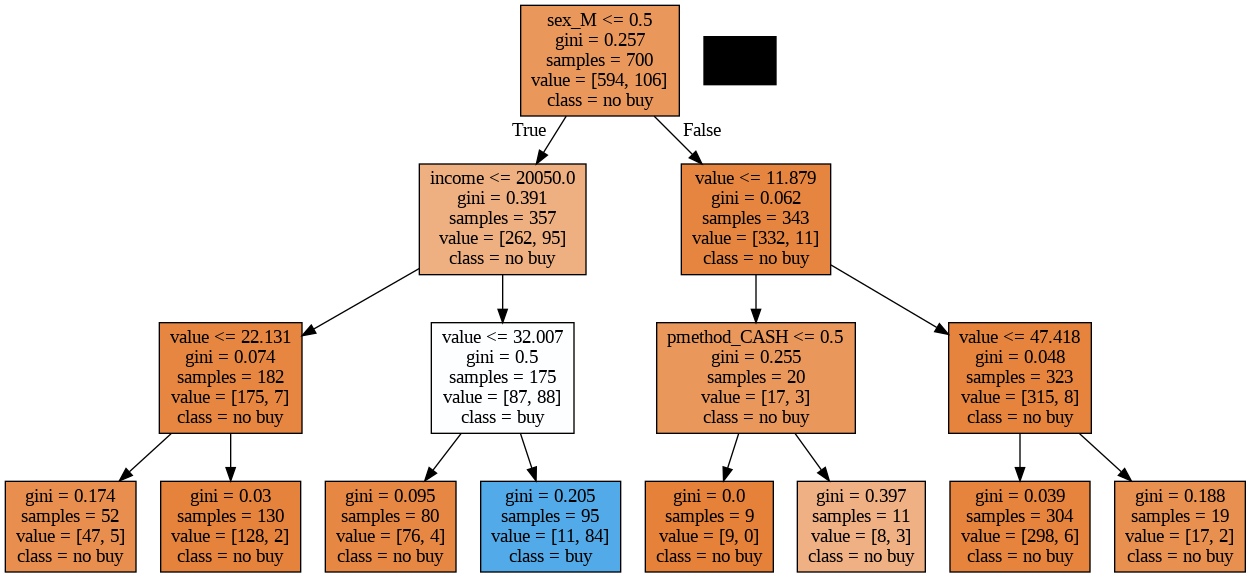

In [28]:
'''
The graphviz library is used to visualize the tree. 
'''

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=['no buy', 'buy'], filled=True) #or use y_train.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PNG 
#graph.write_png("clf.png") #uncomment this line to save the plot as a .png file

Who buys wine and chocolate?
- female 
- income above 20050 ( mean 20171, max 30000)
- shopping value > $32 

Kinda hard to target beyond "is female". 

<table><tr>
<td> <img src="Images/businesswine.jpg" alt="Drawing" style="width: 450px;"/> </td>
<td> <img src="Images/winechoco.jpg" alt="Drawing" style="width: 350px;"/> </td


</tr></table>

# 3. Fish & Fruit

### Data split

In [29]:
y_FF = data['fish_and_fruit']
X_train, X_test, y_train, y_test = train_test_split(X, y_FF, test_size = 0.3, random_state = 12345) #split data 70:30a

### Tree model

In [30]:
#Define Decision tree classifier with some default parameters
clf = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=2, 
                             min_samples_leaf=3).fit(X_train, y_train)

In [31]:
#Use classifier to predict labels
y_pred = clf.predict(X_test)

In [32]:
print ("Accuracy is: ", (accuracy_score(y_test,y_pred)*100).round(2))

Accuracy is:  94.67


Fontconfig error: Cannot load default config file



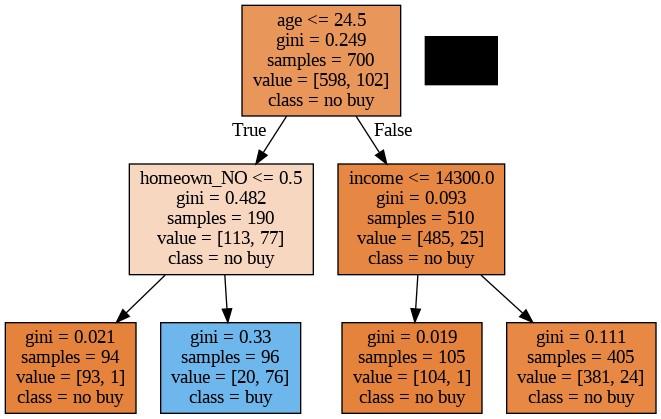

In [33]:
'''
The graphviz library is used to visualize the tree. 
'''

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=['no buy', 'buy'], filled=True) #or use y_train.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PNG 
#graph.write_png("clf.png") #uncomment this line to save the plot as a .png file

Who buys fish and fruit?
- younger than 24.5 years
- Do NOT own a home (probability of "homeown_No" < 0.5 = False is equivalent to prob. "homeown_No" > 0.5 = True) 

One possible explanation could be education (variable not available). High education might prevent early home ownership as students enter the worklife later and cannot afford a house in their mid-20s. In contrast, people who go for jobs that do not require higher education start earning money earlier and are able to afford their own place earlier. Yet, this young generation is more health conscious and opts for buying fish and fresh vegetables. 

<table><tr>
<td> <img src="Images/uni.jpg" alt="Drawing" style="width: 450px;"/> </td>
<td> <img src="Images/fish.jpg" alt="Drawing" style="width: 350px;"/> </td>
    <td> <img src="Images/yoga.jpg" alt="Drawing" style="width: 450px;"/> </td>


</tr></table>

# Conclusion


In this tutorial we learned:
- how to perform association rule mining in Python with the **Apriori algorithm** to find common shopping patterns,
- how to define new variables based on these patterns, 
- how to use background data to understand what kind of customers are behind these patterns, 
- how to apply a Decision Tree algorithm to connect background data to the newly found ("mined") shopping patterns.

With these skills, **we are able to understand not only "what is frequently bought together", but also WHO buys it.**
